Plotting with categorical data
In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relatinship between relplot() and either scatterplot() or lineplot(),  there are two ways to make these plots.
There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It's helpful to think of the different categorical plot kinds as belonging to three different families, which we'll discuss in detail below. They are:

Categorical scatterplots:

stripplot() (with kind="strip"; the default)
swarmplot() (with kind="swarm")

Categorical distribution plots:
boxplot() (with kind="box")
violinplot() (with kind="violin")
boxenplot() (with kind="boxen")

Categorical estimate plots:
pointplot() (with kind="point")
barplot() (with kind="bar")
countplot() (with kind="count")

These families represent the daata usinng different levels of granularity. when deciding which to use, you'll have to think about the question that you want to answer. The unified API makes it wasy to switch between different kinds and see
your dataa from several perspectives.

Mostly, we will focus on the figure-level interface, catplot(). Remember that this function is a higher-level interface each of the functions above, so we'll reference them when we show each kind of plot, keeping the more verbose kinnd-specific API documentation at hand.

Categorical scatterplots
The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the poinnts beloning to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default "ind" in catplot() is to adjust the positions of poionnts on the categorical axis with a small amount of random "jitter":

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


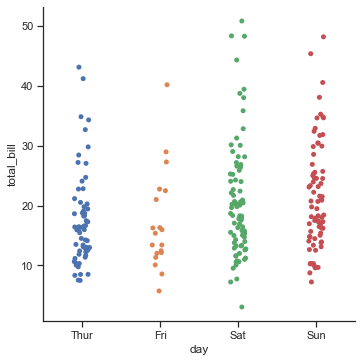

In [2]:
tips= sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

In [3]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


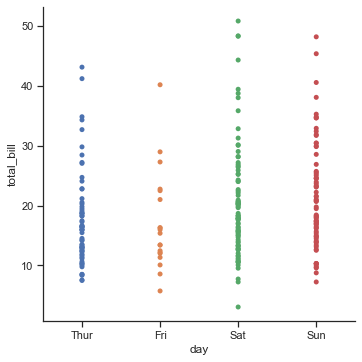

In [4]:
#the jitter parameter controls the magnitude of jitter or disables it altogether:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representatino of the distribution of observations, alothough it only works well for relatively small datasets. This kind of plot is sometimes called a "beeswarm" and is drawn in seaborn by swarmplot(), which is activated by
setting kind="swarm" in catplot():

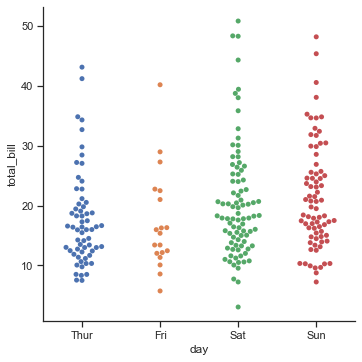

In [5]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

Similar to the relational plots, it's possible to add dimension to a categorical plot by usinng a hue semantic. (The categorical plots do not currently support size or style semantics). each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

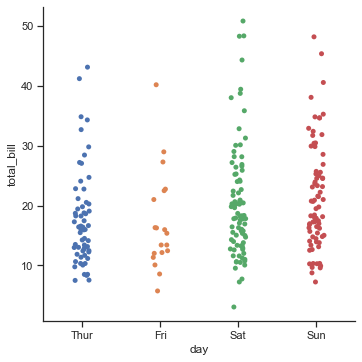

In [6]:
sns.catplot(x="day", y="total_bill", data= tips)

The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter. This can be important when drawing multiple categorical plots in the same figure, which we'll see more of below:

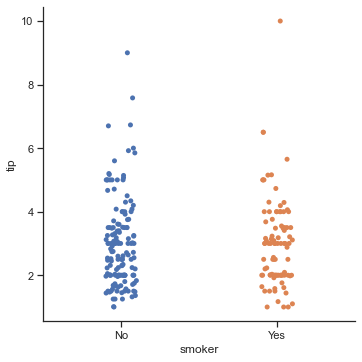

In [7]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

We've refered to the idea of "categorical axis". Inn these examples, that's always corresponded to the horizontal axis. But it's often helpful to put the categorical variable on the vertical axis(particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

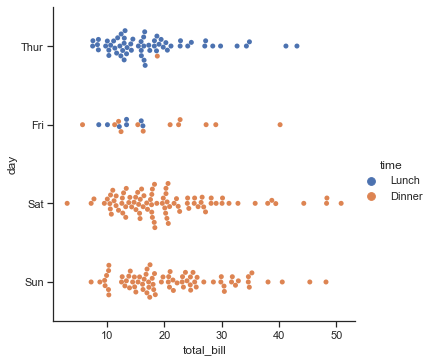

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

Distributions of observations within categories
As the size of the dataaset grows, categorical scatter plots become limited in the information
they can provide about the distribution of values within each category. when this happens,
there are several approaches for summarizing the distributional informatin
in way that facilitate easy comparisons across the category levels.

Boxplots
The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to pointns that lie within 1.4 IQRs of the lower and upper quartile, and then observations that fall outside this range displayed independently. This means that each values in the boxplot cocrresponds to an actual observation in the data.

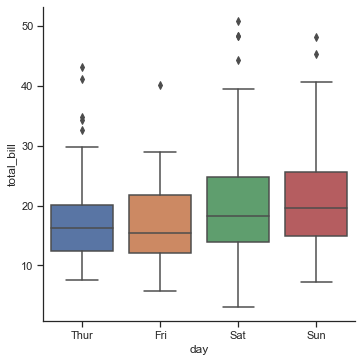

In [9]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis they don't overlap:

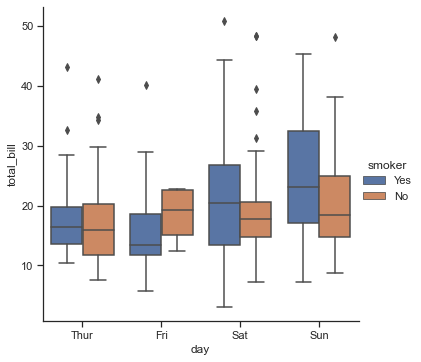

In [10]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

This behavior is called "dodging" and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. if that's not the case, you can disable the dodging:

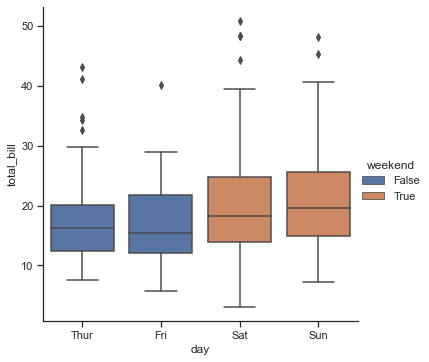

In [11]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

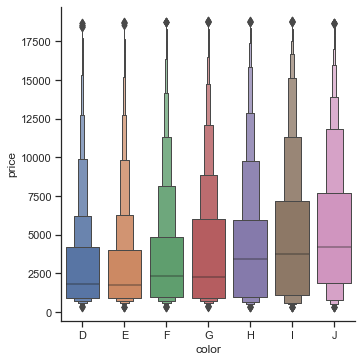

In [12]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
           data=diamonds.sort_values("color"))

In [13]:
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

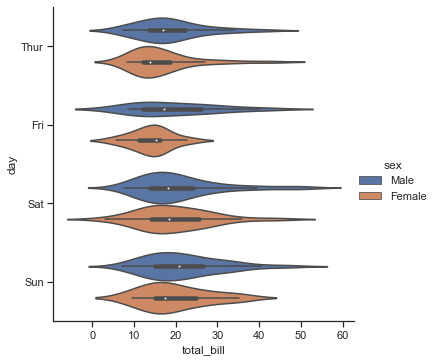

In [14]:
sns.catplot(x="total_bill", y="day", hue="sex",
           kind="violin", data=tips)

This approach uses the kernel density estimate to provide a richer description of the  distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

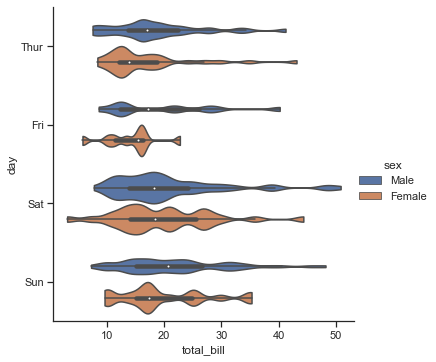

In [15]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

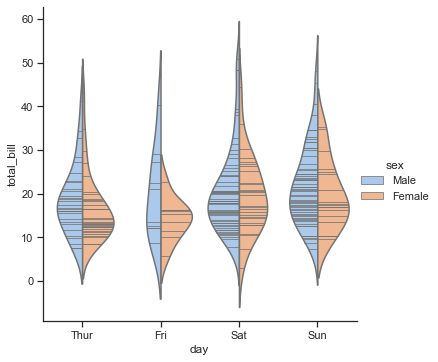

In [16]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips)

It can also be useful to combine swarmplot() or stripplot() with a box plot
to show each observation along with a summary of the distribution:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

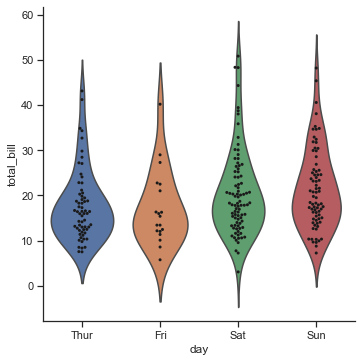

In [17]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

Statistical estimation within categories
For other applications, rather than showing the distribution within each category, you might want to show an estimmate of the central tendency of the values. seaaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function obtain
the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using errors bars:

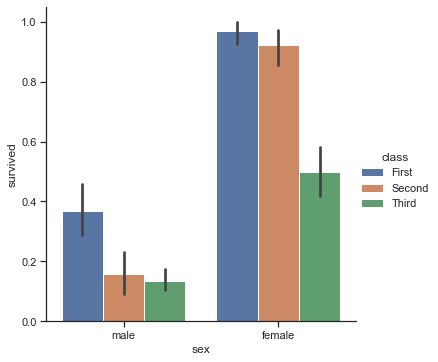

In [18]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the countplot() function:

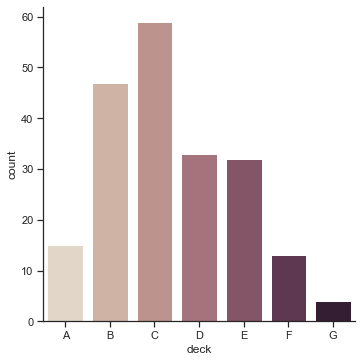

In [19]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

Both barplot(0) and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each functin:

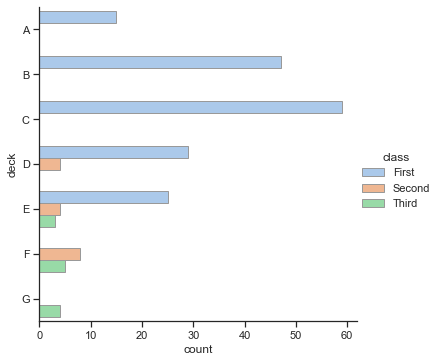

In [20]:
sns.catplot(y="deck", hue="class", kind="count",
           palette="pastel", edgecolor=".6",
           data=titanic)

Point plots
An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. Theis make is easy to see how the main relationship is changing as function of the hue semantic, because your eyes are quite good at pickinng up on difference of slopes:

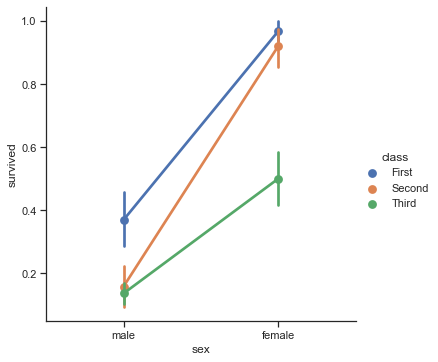

In [21]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

While the categorical functions lack the style semantic of the relation functions, it can still be a good to vary the marker and/or linestyle along with the hue to make figure that are maximally accessible and reproduce well in black and white:

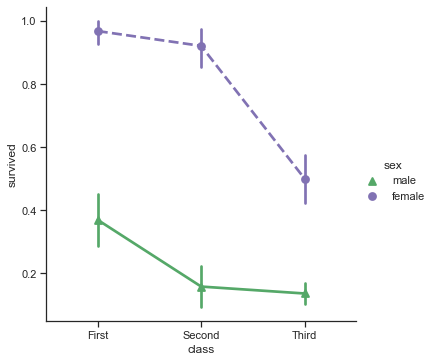

Plotting "wide-form" data
While using "long-form" or "tidy" data is preferred, these functions can also by applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

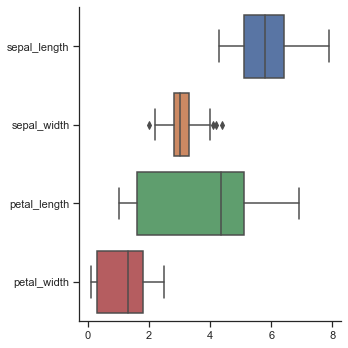

In [23]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")


Additionally, the axes-level functins accept vectors of Pandas or numpy objects rather than variables in a DataFrame

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

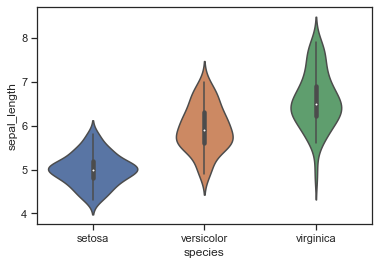

In [24]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

To control the size and shape of plots made by the functinos discussed above, you must set up the figure yourself using matplotlib commands:

<AxesSubplot:xlabel='count', ylabel='deck'>

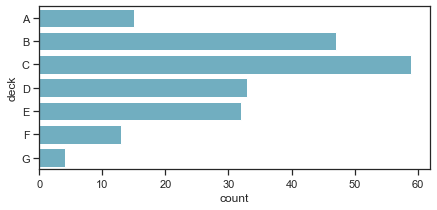

In [25]:
f, ax= plt.subplots(figsize=(7,3))
sns.countplot(y="deck", data=titanic, color="c")

This is the approach you should take when you need a categorical figure to happily coexist in a more complex figure with other kinds of plots.

Showing multiple relationships with facets
Just like relplot(), the fact that catplot() is built on FacetGrid means that is easy to add faceting variables to visualize higher-dimensional relationships:

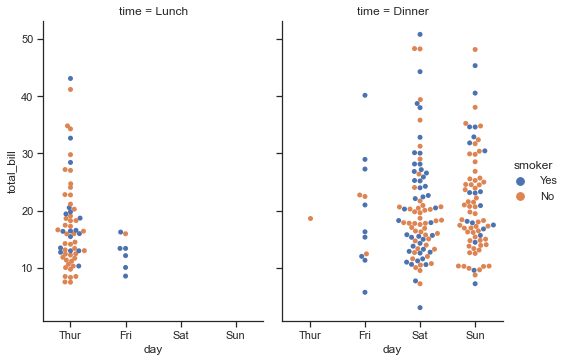

In [26]:
sns.catplot(x="day", y="total_bill", hue="smoker",
           col="time", aspect=.7,
            kind="swarm", data=tips)


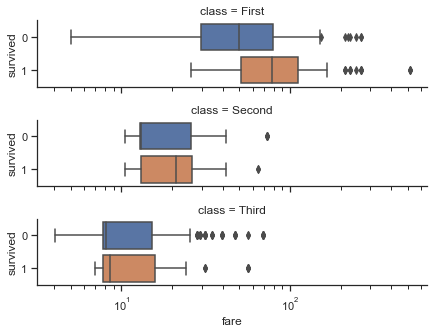

In [27]:
#For further customization of the plot, you can use the methods on the FacetGrid object that it returns:
g = sns.catplot(x="fare", y="survived", row="class",
               kind="box", orient="h", height=1.5, aspect=4,
               data=titanic.query("fare > 0"))
g.set(xscale="log")